# Capter2

## 1. 기본 통계량 계산

통계량의 계산이나 기본적인 데이터 분석에 사용되는 함수는 numpy와 scipy 패키지에 들어있다. 우선, 필요한 패키지를 불러들인 후 fish_data라는 변수에 10개의 데이터를 저장한다.

In [1]:
import numpy as np
import pandas as pd
import scipy as sp

fish_data=np.array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])
fish_data

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

위의 예제 데이터를 이용하여 기본적인 통계량을 계산한다.

In [2]:
sum(fish_data)

40

In [3]:
np.mean(fish_data)

4.0

일반적으로 분산은 불편분산을 이용한다.
* 분산은 표본분산과 불편분산으로 나뉜다.
* 표본분산 : 표본에서 계산된 분산. 모집단에 비해 표본수가 적을 경우, 표본분산이 모분산보다 작아진다. n으로 나눈다.
* 불편분산 : 표본분산이 모집단 분산에 맞춰 동일하게 보정된 분산. n-1로 나눈다.

왜 불편분산을 사용하는가? 분산은 데이터와 평균 간의 거리기 때문에 모평균과 데이터와의 거리를 계산해야 한다. 하지만 모평균을 모르기 때문에 표본평균과의 거리를 계산해야 한다. 표본평균은 모평균에 대한 불편추정량이기 때문이다. 하지만 표본평균과 데이터와의 거리는 모평균과 데이터와의 거리보다 좁을 수밖에 없다. 따라서 거리가 과소평가되는 경향이 있다. 따라서 이러한 문제를 피하기 위해 n 대신 n-1로 나누어 보정을 하는 것이다. 그리고 그 값이 불편분산이다.

In [4]:
sigma=np.var(fish_data, ddof=1) ## ddof : 델타의 자유도, ddof=0일 때는 n으로 나눈 값, ddof=1일 때는 n-1로 나눈 값을 출력한다.
print(sigma)

1.3333333333333333


In [5]:
print(np.sqrt(sigma))
print(np.std(fish_data, ddof=1))

1.1547005383792515
1.1547005383792515


In [6]:
print(np.max(fish_data))
print(np.min(fish_data))

6
2


In [7]:
np.median(fish_data)

4.0

* 1 quartile = 0.25 quantile
* 2 quartile = .5 quantile
* 3 quartile = .75 quantile

In [8]:
print(np.quantile(fish_data, .25)) ## first quartile
print(np.quantile(fish_data, .5)) ## second quartile
print(np.quantile(fish_data, .75)) ## third quartile

3.25
4.0
4.75


## 2. sklearn of machine learning

본격적으로 데이터 분석으로 들어가기 전에 python의 package인 sklearn의 built-in dataset에 대해 간단히 알아보도록 한다. sklearn에 내장되어 있는 dataset을 이용하기 위해 다음을 참고한다.

### 1) Built-In dataset

* load_iris()
* load_diabetes()
* load_digits()
* load_linnerud()
* load_wine()
* load_breast_cancer()

### 2) Dataset

built-in dataset은 sklearn.utils.Bunch라는 자료구조를 활용한다. key-value 형식으로 구성되어 있으며, dictionary형 타입과 유사한 구조를 가진다. 공통 key는 다음과 같다.

* data : feature(설명변수 X), numpy 배열 형태 또는 Matrix
* target : target(종속변수 Y), numpy 배열 형태 또는 Matrix
* feature_names : feature 데이터(X)의 이름
* target_names : target 데이터(Y)의 이름
* DESCR : 데이터 셋에 대한 설명
* filename : 데이터 셋의 파일 저장 위치(csv)

## 3. Regression

통계적 분석 방법은 크게 regression과 classification으로 나뉜다. regression은 Y(종속변수, target)가 numeric인 경우, classification은 Y가 categorical인 경우 이용한다. 방법은 다르지만 두 분석 방법의 목적은 모두 예측값을 구하기 위함이다.

regression은 통계적 분석 방법의 하나로, 데이터에 있는 독립변수들과 종속변수 사이의 관계를 모델링하여 예측값을 구하는 방법이다. regression은 크게 simple linear regression과 multiple linear regression으로 나뉜다. single linear regression의 경우 하나의 X(설명변수, feature)값을 이용하는 모델이고, multiple linear regression은 여러 개의 X(multiple features)를 이용하여 Y를 예측하는 모델이다.

### 1) Python for Regression

sklearn을 이용하여 회귀분석을 수행하는 코드에 대해 간단히 알아보도록 한다. 우선 model이 들어있는 package를 import한다.

In [9]:
from sklearn.linear_model import LinearRegression

package에서 이용할 모델을 정의한다.

In [10]:
model=LinearRegression()

linear regression model의 intercept와 coefficient는 아래의 과정을 통해 확인할 수 있다.
```
model.intercept_
model.coef_
```
R의 경우 model fitting 후 summary() 함수를 이용할 수 있지만 sklearn은 machine learning에 초점을 맞춘 package이기 때문에 summary 함수를 제공하지 않는다. 대신, statsmodels package에서 summary 함수를 제공한다.

simple linear regression은 두 변수(X, Y) 사이에 선형성이 존재한다고 가정한다. 따라서, 이 가정을 토대로 linear model을 추정한다.

회귀분석의 과정은 데이터를 이용하여 intercept와 slope를 추정하는 것이다. 이때, 데이터에 의해 추정된 회귀식은 추정 값과 fitted value(y hat) 값에 hat을 씌워서 나타낸다.

estimated intercept와 estimated slop, fitted value(predicted value)

여기서 추정된 y hat과 실제 y 값으로부터 잔차(residual)의 개념이 발생하는데 잔차란 실제 y와 y hat의 차이로 구할 수 있다.

회귀 식을 추정하기 위해서는 잔차를 제곱하여 그 합을 최소화하는 intercept와 slope를 선택한다. 잔차의 제곱합인 residual sum of squares(RSS)의 값을 최소화하는 추정하는 식을 잘 정리해두자.
* OLS(Ordinary Least Squares), 최소제곱법 : 잔차제곱합(RSS)를 최소화하는 방법을 최소제곱법(OLS)이라고 한다. OLS가 회귀분석에 널리 쓰이게 된 이유 중 하나가 계산의 편의성 때문이다.

마지막으로 추정한 회귀식이 예측값을 잘 맞추는지 확인하기 위해서 y와 y hat에 대한 그래프를 통해 확인한다. 예시 데이터를 이용하여 python에서 simple linear regression을 추정하는 과정을 알아보자.

#### a) import the dataset

회귀분석을 위한 라이브러리를 불러들인다. (seaborn과 matplotlib는 visualization을 위한 라이브러리이다.)

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import datasets

# 그래프 배경 화면을 격자 회색으로 설정
sns.set_theme(color_codes=True)

경력(YearsExperience)와 월급(Salary)에 관한 data를 import한다. 경력(YearsExperience)은 X(설명변수)이며, 월급(Salary)은 Y(반응변수)이다.

In [12]:
mydata=pd.read_csv('https://raw.githubusercontent.com/sudarshan-koirala/Salary-Prediciton-based-on-Years-of-Experience/master/Salary_Data.csv')
mydata.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#### b) data preprocessing

model에 데이터를 fitting하기 위해서 전처리 과정이 필요하다. 데이터를 X와 Y로 나눈다.

In [13]:
X=mydata.iloc[:, :-1].values ## .values를 붙이지 않으면 dataframe 형태로 출력됨
Y=mydata.iloc[:, 1].values

#### c) model fitting

simple regression model에 위의 데이터를 fitting한다. 우선, sklearn의 linear_model library에서 LinearRegression class를 import하여 model을 불러온다.

In [14]:
from sklearn.linear_model import LinearRegression

mymodel=LinearRegression()
mymodel.fit(X, Y)

LinearRegression()

In [15]:
print(f'intercept : {mymodel.intercept_}')
print(f'slope : {mymodel.coef_[0]}') ## intercept는 하나지만, coef_는 설명변수의 개수에 따라 값이 여러 개일 수 있기 때문에 index를 작성해준다.

intercept : 25792.20019866871
slope : 9449.962321455074


sklearn의 linear regression은 OLS 방법을 이용하여 model fitting을 한다.

#### d) Test model

추정된 model이 좋은 성능을 보이는지 판단해 본다. 먼저, 데이터와 추정된 model을 시각화하여 그림을 통해 관찰한다.

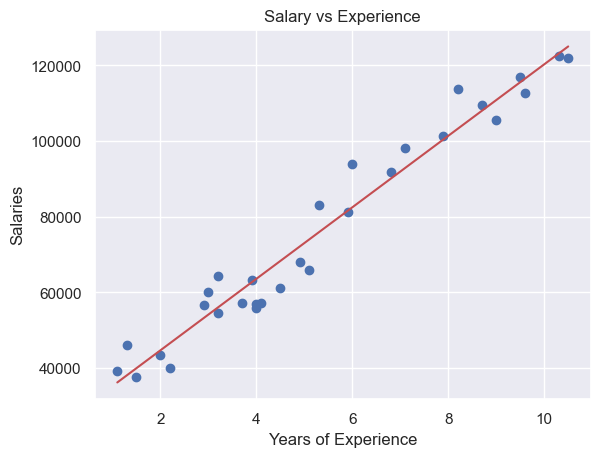

In [16]:
plt.scatter(X, Y, color='b') ## 실제 Y 산점도
plt.plot(X, mymodel.predict(X), color='r') ## fitted value 직선
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salaries')
plt.show()

fitting된 model이 observation들을 지나가고 있는 것을 확인할 수 있다. y와 y hat에 대한 plot으로 다시 한 번 확인한다.

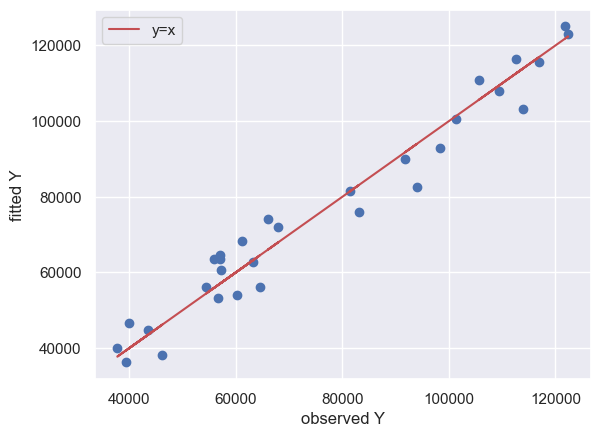

In [17]:
plt.scatter(Y, mymodel.predict(X), color='b') ## y별 fitted value 산점도
plt.plot(Y, Y, color='r', label='y=x') ## y=x 직선
plt.xlabel('observed Y')
plt.ylabel('fitted Y')
plt.legend()
plt.show()

y와 y hat이 y=x 위에 분포되어 있으므로 model이 예측값을 잘 추정하고 있음을 확인할 수 있다. 다음으로 $R^2$을 이용하여 model의 성능을 판단해본다. fitting하는 model의 성능 지표를 어떤 방법을 이용하여 반환하는지 알기 위해서 help를 이용한다.

In [18]:
help(LinearRegression.score)

Help on function score in module sklearn.base:

score(self, X, y, sample_weight=None)
    Return the coefficient of determination of the prediction.
    
    The coefficient of determination :math:`R^2` is defined as
    :math:`(1 - \frac{u}{v})`, where :math:`u` is the residual
    sum of squares ``((y_true - y_pred)** 2).sum()`` and :math:`v`
    is the total sum of squares ``((y_true - y_true.mean()) ** 2).sum()``.
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always predicts
    the expected value of `y`, disregarding the input features, would get
    a :math:`R^2` score of 0.0.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a precomputed
        kernel matrix or a list of generic objects instead with shape
        ``(n_samples, n_samples_fitted)``, where ``n_samples_fitted``
        is the number of sample

In [19]:
print(round(mymodel.score(X, Y), 3)) ## help 파일로 .score 사용용

0.957


$R^2$의 값이 0.957로 매우 높다. 이는 모델이 Y의 변동량의 대부분을 설명한다는 것을 의미한다.

모델 평가

모델의 성능을 판단하기 위한 여러 가지 지표들이 있다.

a) RMSE(Root Meean Square Error, 평균 제곱근 오차)

RMSE는 예측된 y hat 값들의 평균 제곱 오차의 제곱근을 말한다(y hat 값들의 제곱 오차의 평균의 제곱근)

RMSE는 전반적인 모델의 정확도를 측정하고 다른 모델과 비교하기 위한 기준이 된다.

b) $R^2$ (R-squared, 결정계수)

$R^2$의 범위는 0에서 1까지이며 모델 데이터의 변동률을 측정한다. 모델이 데이터에 얼마나 적합한지 평가하고자 할 때, 회귀분석을 설명하기 위한 용도로 활용된다.

분모는 Y의 분산에 비례한다. 또한, 모델에 대한 예측값이 실제값과 일치하면 $R^2$는 1이 된다. $R^2$는 모델이 데이터를 얼마나 잘 설명하고 있는지에 대한 지표라고 생각할 수 있다. 

* statsmodels

statsmodels package의 summary 함수의 결과와 비교한다.

In [20]:
import statsmodels.api as sm

X=sm.add_constant(X)
model=sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           1.14e-20
Time:                        23:34:20   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
x1          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

분석에 필요한 파라미터 빼내기

In [21]:
# extract coefficient
print('====================')
print('model parameters')
print('====================')
print(model.params) ## index 0은 상수, index 1은 slope
print('====================')

# extract t-value
print('t-values')
print('====================')
print(model.tvalues)

model parameters
[25792.20019867  9449.96232146]
t-values
[11.34693968 24.95009424]


### 3) multiple linear regression(MLR)

multiple linear regression(MLR)은 multiple regression으로 불리기도 하며, 한 개의 반응변수(Y)를 예측하기 위해 여러 개의 설명변수(X)를 이용하는 방법이다.

MLR은 직선의 형태가 아니지만, 각 계수와 그 변수들 사이의 관계는 여전히 선형이므로 선형모형이다.

#### a) import the dataset

disbetes(당뇨병 데이터를 이용하여 MLR의 회귀식을 추정해보도록 한다. sklearn의 built-in dataset인 당뇨병 환자 데이터를 불러온 후 어떤 key가 있는지 확인한다.

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import datasets

In [23]:
mydata=datasets.load_diabetes()
mydata.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [24]:
type(mydata) ## dtype은 ndarray 원소의 데이터 타입을 반환한다. 반면 type(A)은 A의 데이터 타입을 반환
## 빌트인 데이터셋은 sklearn.utils.Bunch 라는 자료구조를 활용합니다.
## key-value 형식으로 구성되어 있으며, 사전(dict)형 타입과 유사한 구조를 가지고 있습니다.

sklearn.utils._bunch.Bunch

dataset을 data frame으로 만든다.

In [25]:
df=pd.DataFrame(mydata['data'], columns=mydata['feature_names'])
df['diabetes_score']=mydata['target']
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_score
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


age 데이터의 숫자가 실수형인데, 이는 모든 특성이 -0.2~0.2 사이에 분포하도록 조정했기 때문이다.

이 데이터에서 target은 당뇨병 수치(diabetes_score)이고 나머지 feature names에 속하는 age, sex, bmi, bp 등은 feature이다. 따라서, 이 데이터는 442명의 사람들을 대상으로 당뇨병 수치를 추정하기 위한 10가지 feature를 나열한 것이다.

In [26]:
print('target : diabetes_score(당뇨병 수치)')

for i, feature_name in enumerate(mydata.feature_names):
    print(f'feature{i+1} : {feature_name}')

target : diabetes_score(당뇨병 수치)
feature1 : age
feature2 : sex
feature3 : bmi
feature4 : bp
feature5 : s1
feature6 : s2
feature7 : s3
feature8 : s4
feature9 : s5
feature10 : s6


* enumerate() : for문 결과 출력시 인덱스를 출력해주는 함수

우선, corr()과 pairplot()을 이용해 target과 변수들 간의 correlation을 관찰한다.

In [27]:
df.corr()

# diabetes_score이 target이므로 마지막 행만 출력한다.
df.corr().tail(1)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_score
diabetes_score,0.187889,0.043062,0.58645,0.441482,0.212022,0.174054,-0.394789,0.430453,0.565883,0.382483,1.0


target과 correlation이 가장 높은 변수는 bmi이다.

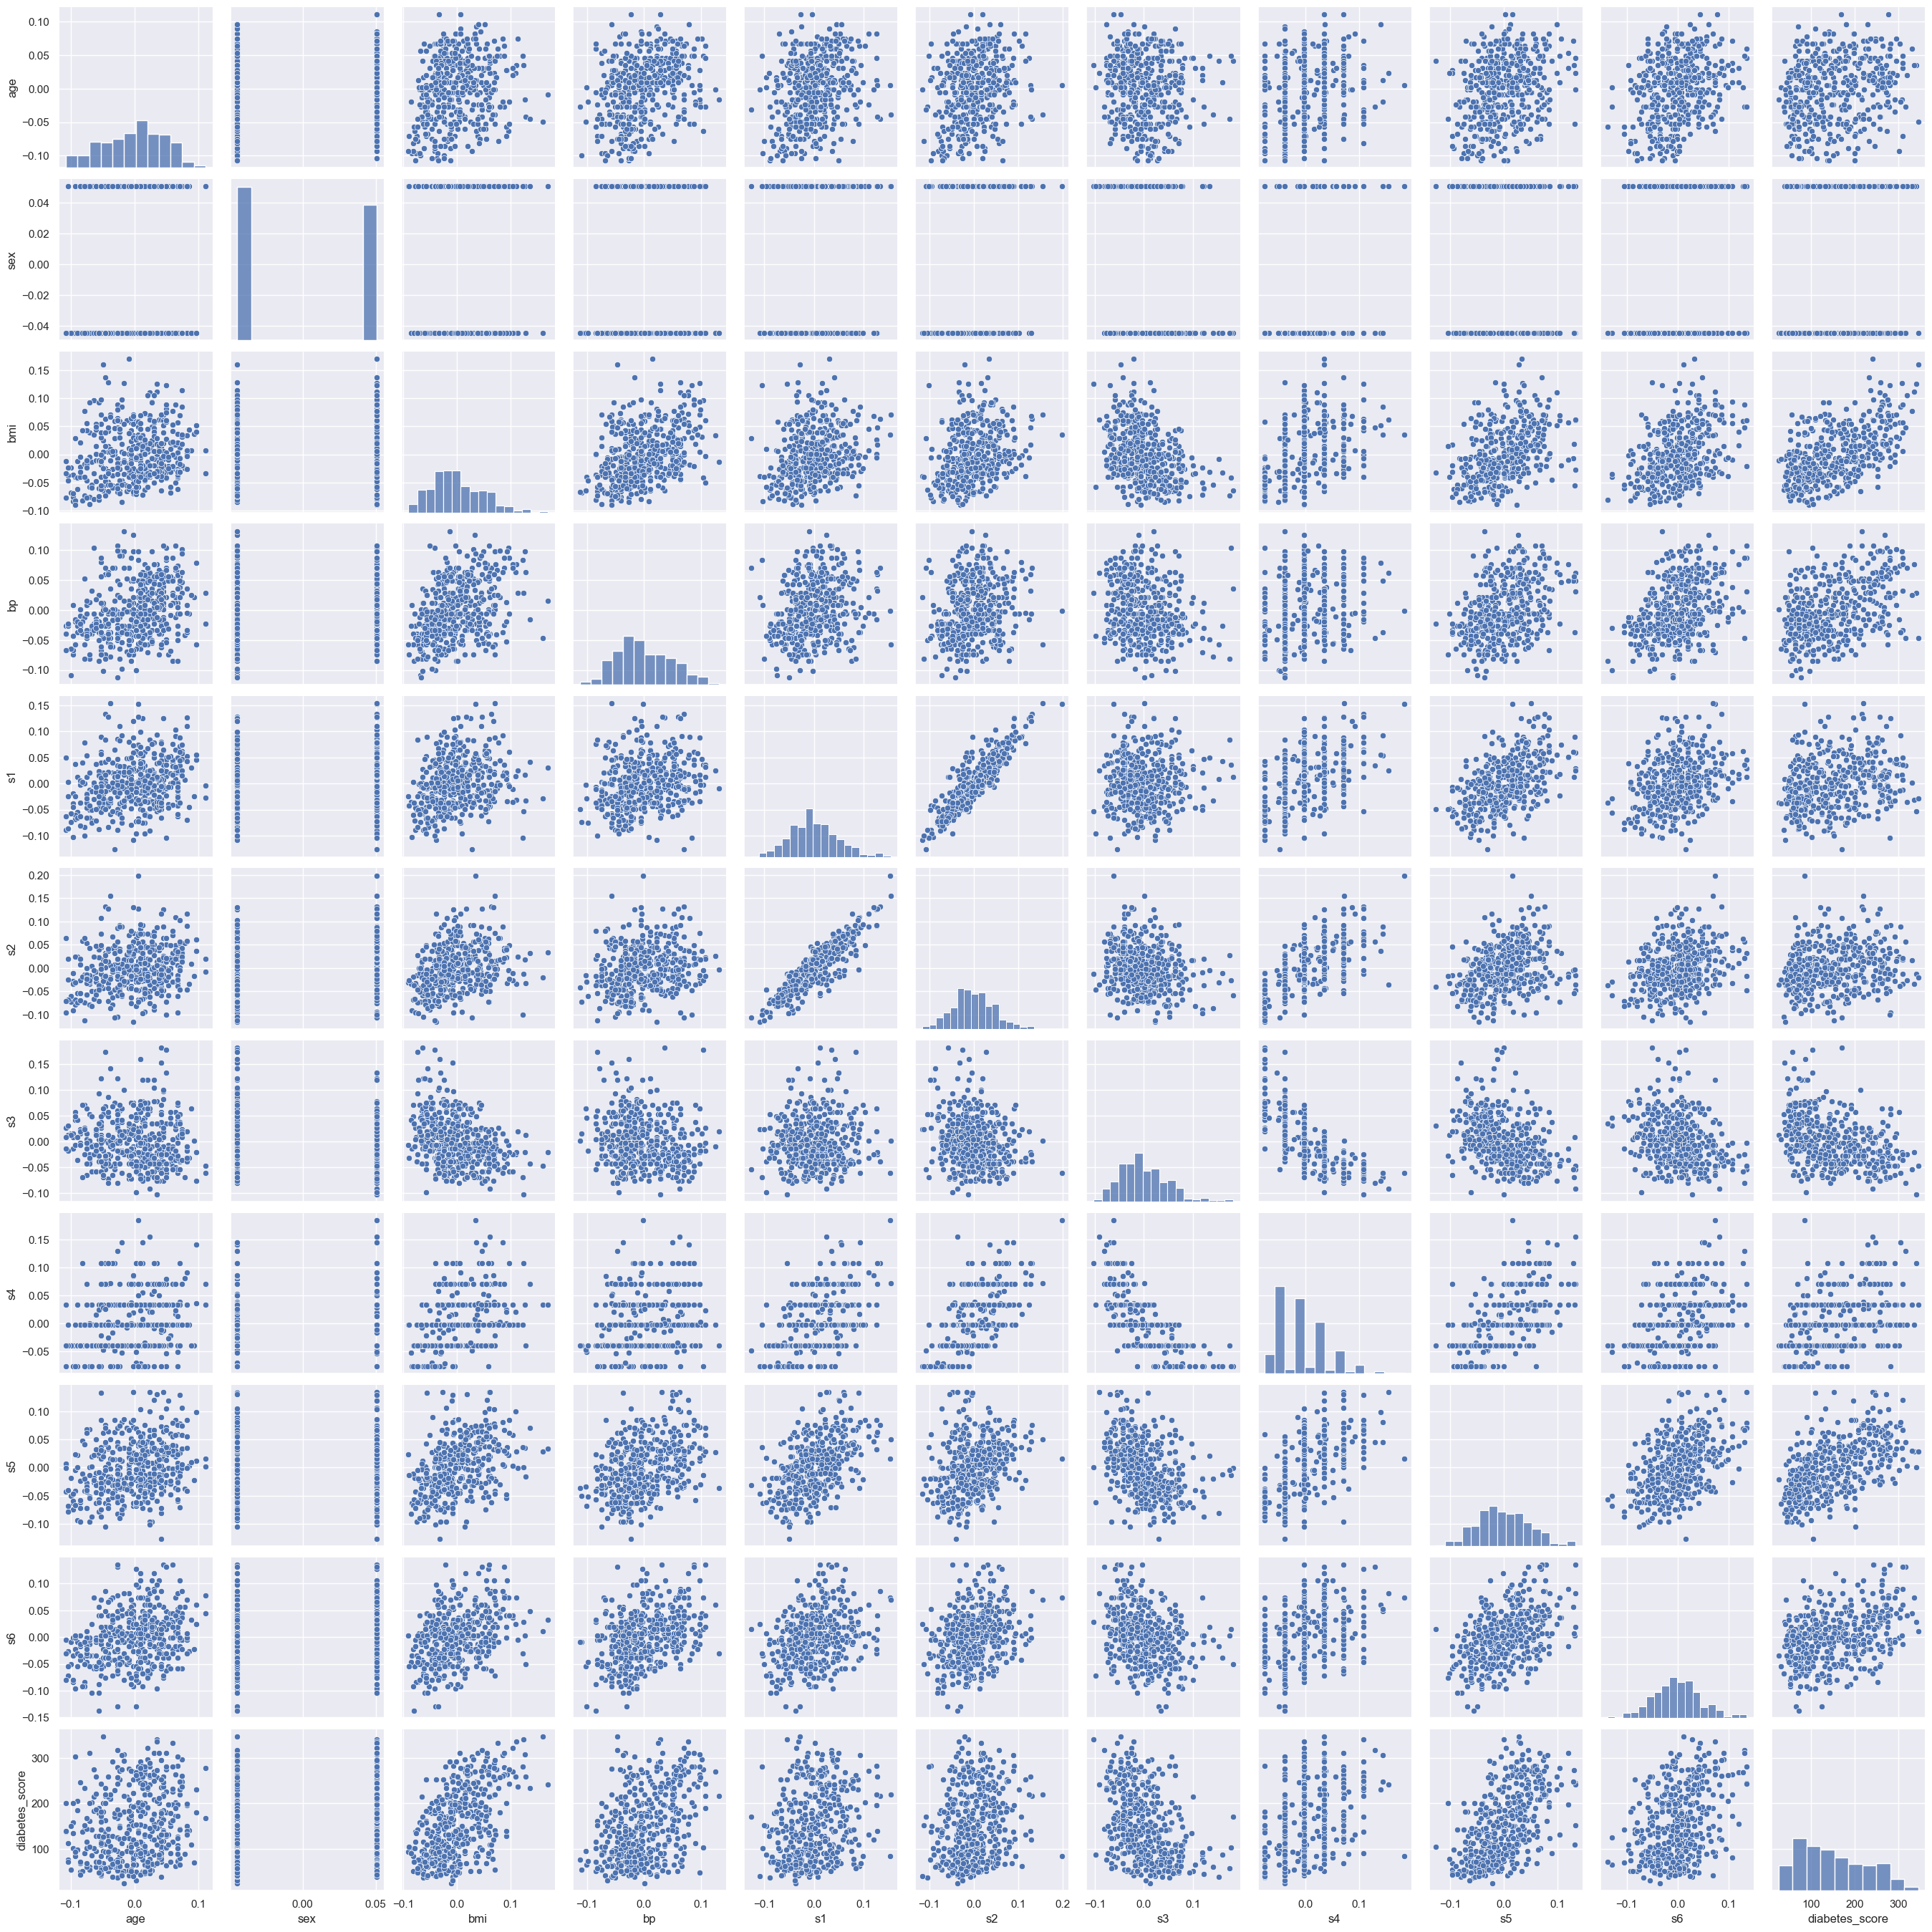

In [28]:
import warnings
warnings.filterwarnings(action = 'ignore')

sns.pairplot(data=df)
plt.show()

scatter plot을 통해 sex는 categorical variable임을 알 수 있고, s1과 s2 사이에는 강한 선형성이 관찰된다.

#### b) data preprocessing

model fitting을 위해 데이터를 X와 Y로 나눈다.

In [29]:
X=df[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']]
Y=df[['diabetes_score']]

#### c) model fitting

MLR에 위의 데이터를 fitting한다.

In [30]:
from sklearn.linear_model import LinearRegression

mymodel=LinearRegression()
mymodel.fit(X, Y)

LinearRegression()

In [31]:
mymodel.intercept_

array([152.13348416])

In [32]:
mymodel.coef_

array([[ -10.0098663 , -239.81564367,  519.84592005,  324.3846455 ,
        -792.17563855,  476.73902101,  101.04326794,  177.06323767,
         751.27369956,   67.62669218]])

In [33]:
print(f'intercept : {mymodel.intercept_}')
for i, feature_name in enumerate(mydata.feature_names):
    print(f'{feature_name} coef : {mymodel.coef_[0, i]}')

intercept : [152.13348416]
age coef : -10.009866299810703
sex coef : -239.81564367242245
bmi coef : 519.8459200544606
bp coef : 324.3846455023234
s1 coef : -792.1756385522312
s2 coef : 476.7390210052575
s3 coef : 101.04326793803367
s4 coef : 177.06323767134637
s5 coef : 751.2736995571037
s6 coef : 67.62669218370469


#### d) Test model

마지막으로 시각화와 $R^2$ 값을 이용하여 model의 성능을 판단한다. 우선 y와 y hat을 이용하여 plot을 그린다.

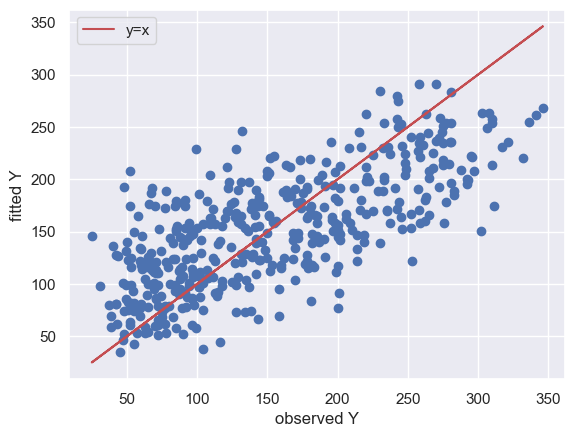

In [34]:
plt.scatter(Y, mymodel.predict(X), color='b')
plt.plot(Y, Y, color='r', label='y=x')
plt.xlabel('observed Y')
plt.ylabel('fitted Y')
plt.legend()
plt.show()

y와 y hat이 y=x 주변에 가까이 분포되어 있다. 다음으로 $R^2$을 이용하여 model의 성능을 판단한다.

In [35]:
print(round(mymodel.score(X, Y), 3))

0.518


cf. statsmodel

statsmodel package의 summary 함수의 결과와 비교한다.

In [36]:
import statsmodels.api as sm

X=sm.add_constant(X)
model=sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         diabetes_score   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           3.83e-62
Time:                        23:34:33   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.000     147.071     157.196
age          -10.0099     59.749     -0.168      0.867    -127.446     107.426
sex         -239.8156     61.222     -3.917      0.000    -360.147    -119.484
bmi          519.8459     66.533      7.813      0.000     389.076     650.616
bp           324.3846     65.422      4.958      0.000     195.799     452.970
s1          -792.1756    416.680     -1.901      0.058   -1611.153      26.802
s2           476.7390    339.030      1.406      0.160    -189.620    1143.098
s3           101.0433    212.531      0.475      0.635    -316.684     518.770
s4           177.0632    161.476      1.097      0.273    -140.315     494.441
s5           751.2737    171.900      4.370      0.000     413.407    1089.140
s6            67.6267     65.984      1.025      0.306     -62.064     197.318
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# extract coefficient
print('====================')
print('model parameters')
print('====================')
print(model.params)
print('====================')

# extract R-square
print('R-square')
print('====================')
print(model.rsquared)
print('====================')

# extract t-value
print('t-values')
print('====================')
print(model.tvalues)

model parameters
const    152.133484
age      -10.009866
sex     -239.815644
bmi      519.845920
bp       324.384646
s1      -792.175639
s2       476.739021
s3       101.043268
s4       177.063238
s5       751.273700
s6        67.626692
dtype: float64
R-square
0.5177484222203498
t-values
const    59.061366
age      -0.167531
sex      -3.917126
bmi       7.813302
bp        4.958343
s1       -1.901161
s2        1.406183
s3        0.475427
s4        1.096531
s5        4.370412
s6        1.024891
dtype: float64


## 4. Classification

Y가 범주형 자료인 경우 설명변수를 이용하여 Y를 잘 분류할 수 있는 classifier를 잘 구축하는 것이 목표이다. Regression과의 차이점은 classification의 경우 OLS 방법을 이용할 수 없기 때문에 loss function을 이용하여 model fitting을 다른 방식으로 진행한다. 여기서는 Logistic Regression과 LDA를 이용한 classification을 설명한다.

### 1) logistic regression

일반적인 회귀분석은 독립변수들에 의해 종속변수의 변화가 직선적으로 변한다고 가정한다. 이런 가정은 종속변수가 이항적인 상황에서 적합하지 않다. 종속변수가 범주형 변수인 상황에서 적용할 수 있는 회귀분석 방법이 로지스틱 회귀분석이며 예측값으로 확률을 계산하여 각 클래스에 속할 확률을 계산한다.
* 로짓(logit) : 실수 전체의 범위에서 어떤 클래스에 속할 확률을 결정하는 함수
* 오즈(odds) : 실패(0)에 대한 성공(1)의 비율
* 연결 함수(log odds, logit function) : 계산 결과가 확률로 나오기 위해 로짓의 값을 입력받아 확률로 변환해주는 함수

cf) 선형 회귀분석은 종속변수가 연속형이다.

관련 개념 필기 보기

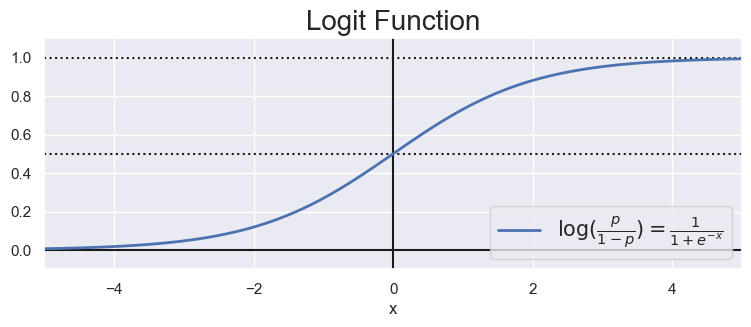

In [38]:
# plotting logit function
x=np.linspace(-5, 5, 100)
odds=1/(1+np.exp(-x))
plt.figure(figsize=(9, 3))
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [0.5, 0.5], 'k:')
plt.plot([-5, 5], [1, 1], 'k:')
plt.plot([0, 0], [-1.1, 1.1], 'k-')
plt.plot(x, odds, 'b-', linewidth=2, label=r'$\log(\frac{p}{1-p})=\frac{1}{1+e^{-x}}$')
plt.title('Logit Function', fontsize=20)
plt.xlabel('x')
plt.legend(loc='lower right', fontsize=15)
plt.axis([-5, 5, -0.1, 1.1])
plt.show()

다음으로 logistic regression의 예시를 보자. 데이터 분석의 목적은 학생들의 GPA 시험 성적을 이용한 합격 여부 예측이다.

#### a) import dataset

In [39]:
import pandas as pd
math=pd.read_csv('http://home.ewha.ac.kr/~josong/dm/mathcat.data', sep='\s+')
math.head()

,hsgpa,hsengl,hscalc,course,passed,outcome
1,78.0,80,Yes,Mainstrm,No,Failed
2,66.0,75,Yes,Mainstrm,Yes,Passed
3,80.2,70,Yes,Mainstrm,Yes,Passed
4,81.7,67,Yes,Mainstrm,Yes,Passed
5,86.8,80,Yes,Mainstrm,Yes,Passed


#### b) data preprocessing

In [40]:
math_new=math.drop('outcome', axis=1) ## passed가 이미 결과를 표시해주기 때문
math_new.head()

,hsgpa,hsengl,hscalc,course,passed
1,78.0,80,Yes,Mainstrm,No
2,66.0,75,Yes,Mainstrm,Yes
3,80.2,70,Yes,Mainstrm,Yes
4,81.7,67,Yes,Mainstrm,Yes
5,86.8,80,Yes,Mainstrm,Yes


hscalc, course, passed는 범주형 변수(binary categorical variable)로 python에서는 라벨 인코딩과 원-핫 인코딩이 필요하다. 각 변수의 범주의 빈도수를 확인한다.

In [41]:
math_new['hscalc'].value_counts()

hscalc
Yes    373
No      21
Name: count, dtype: int64

In [42]:
math_new['passed'].value_counts()

passed
Yes    236
No     158
Name: count, dtype: int64

In [43]:
math_new['course'].value_counts()

course
Mainstrm    328
Catch-up     35
Elite        31
Name: count, dtype: int64

Y(target)에 해당되는 passed는 라벨 인코딩을 한다.

라벨인코딩은 사이킷런의 LabelEncoder 클래스를 통해 구현할 수 있습니다.
LabelEncoder로 객체를 생성한 후 fit()과 transform() 또는 fit_transform()을 호출해서 라벨인코딩을 수행하면 됩니다.

In [44]:
from sklearn.preprocessing import LabelEncoder

#items=math_new.columns[4::2]
le=LabelEncoder()
math_new['passed']=le.fit_transform(math_new['passed'].values)
#for i in items:
#    math[i]=le.fit_transform(math[i])
    
math_new.head()

,hsgpa,hsengl,hscalc,course,passed
1,78.0,80,Yes,Mainstrm,0
2,66.0,75,Yes,Mainstrm,1
3,80.2,70,Yes,Mainstrm,1
4,81.7,67,Yes,Mainstrm,1
5,86.8,80,Yes,Mainstrm,1


hscalc와 course는 범주형 변수이므로 원-핫 인코딩을 이용한다. 파이썬에서는 범주형 변수에 대한 정의를 하지 않으므로 원-핫 인코딩 과정을 통해 범주형 변수임을 정의한다.

원-핫 인코딩을 하기 위한 두 가지 방법이 있다.

##### b-1) pandas의 pd.get_dummies 함수 이용

In [45]:
mymath1=math_new.copy()

In [46]:
import pandas as pd

pd.get_dummies(mymath1['course'], dtype=int)

,Catch-up,Elite,Mainstrm
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
...,...,...,...
390,0,0,1
391,0,0,1
392,0,0,1
393,0,0,1


course는 Catch-up, Elite, Mainstrm 3개의 범주로 이루어져 있는 변수이므로, 해당 범주들이 하나의 컬럼으로 생성되었음을 확인할 수 있다. hscalc도 동일한 과정을 적용한다.

In [47]:
mymath1=pd.get_dummies(data=mymath1, columns=['course', 'hscalc'], prefix=['course', 'hsclac'], dtype=int)
mymath1

,hsgpa,hsengl,passed,course_Catch-up,course_Elite,course_Mainstrm,hsclac_No,hsclac_Yes
1,78.0,80,0,0,0,1,0,1
2,66.0,75,1,0,0,1,0,1
3,80.2,70,1,0,0,1,0,1
4,81.7,67,1,0,0,1,0,1
5,86.8,80,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...
390,88.3,90,1,0,0,1,0,1
391,77.0,79,1,0,0,1,0,1
392,80.7,70,1,0,0,1,0,1
393,80.7,81,1,0,0,1,0,1


LabelEncoder은 alphabetic order로 라벨 인코딩을 진행한다.

3개 이상의 범주형 변수에 대해서 라벨 인코딩만 할 경우 파이썬은 이 변수를 numeric 변수로 인식하기 때문에 반드시 원-핫 인코딩을 통해 범주형 변수로 인식할 수 있도록 변환해야 한다.

pd.get_dummies에서 prefix 옵션은 원래 컬럼의 이름을 앞에 붙여주도록 한다.

##### b-2) sklearn의 OneHotEncoder 이용

sklearn의 OneHotEncoder를 이용하는 경우 벡터의 입력을 허용하지 않기 때문에 reshape 메서드를 통해 array로 변환 후 입력해야 한다.

In [48]:
mymath2=math_new.copy()

course를 원-핫 인코딩

In [49]:
mycourse=mymath2['course']
type(mycourse) ## Series(벡터)

pandas.core.series.Series

In [50]:
mymath2['course']

1      Mainstrm
2      Mainstrm
3      Mainstrm
4      Mainstrm
5      Mainstrm
         ...   
390    Mainstrm
391    Mainstrm
392    Mainstrm
393    Mainstrm
394    Catch-up
Name: course, Length: 394, dtype: object

In [51]:
# Series -> array
mycourse_new=mycourse.values.reshape(-1, 1) ## -1은 394(행 전체 개수), array로 만드는 코드
print(type(mycourse_new)) ## array
print(mycourse_new.shape)

<class 'numpy.ndarray'>
(394, 1)


In [52]:
## OneHotEncoding 모델 정의
from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder(sparse_output=False)

위의 코드에서 OneHotEncoder를 불러온 뒤 정의하였다. 이때, 옵션에서 sparse=True가 디폴트이며, Matrix를 반환한다. 그러나 원-핫인코딩에서 데이터 array형으로 다루기 때문에 sparse=Flase로 지정한다.

In [53]:
# One-Hot Encoding
ohe.fit(mycourse_new)
one_hot_encoded=ohe.transform(mycourse_new)

In [54]:
# dataframe
ohe_df=pd.DataFrame(one_hot_encoded, columns=ohe.categories_[0]) ## ohe.categories_[0] : array(['Catch-up', 'Elite', 'Mainstrm'], dtype=object)
ohe_df

,Catch-up,Elite,Mainstrm
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
389,0.0,0.0,1.0
390,0.0,0.0,1.0
391,0.0,0.0,1.0
392,0.0,0.0,1.0


원-핫 인코딩 후 만들어진 data frame의 인덱스는 0부터 시작하기 때문에 원래 데이터에 병합 시 인덱스가 맞지 않아 NA 데이터가 만들어진다. 따라서, ohe_df의 index가 1부터 시작하도록 만든다.

In [55]:
# mymath2와 ohe_df의 index가 다르므로 조정
ohe_df.index=ohe_df.index+1

# 데이터 병합
mydf=pd.concat([mymath2, ohe_df], axis=1)
mydf.head(3)

,hsgpa,hsengl,hscalc,course,passed,Catch-up,Elite,Mainstrm
1,78.0,80,Yes,Mainstrm,0,0.0,0.0,1.0
2,66.0,75,Yes,Mainstrm,1,0.0,0.0,1.0
3,80.2,70,Yes,Mainstrm,1,0.0,0.0,1.0


hscalc도 같은 방법으로 원-핫 인코딩

In [56]:
myhscalc=mymath2['hscalc']
myhscalc=myhscalc.values.reshape(-1, 1)

ohe.fit(myhscalc)
one_hot_encoded=ohe.transform(myhscalc)

ohe_df=pd.DataFrame(one_hot_encoded, columns=ohe.categories_[0])
ohe_df.index=ohe_df.index+1

mydf=pd.concat([mydf, ohe_df], axis=1)
mydf

,hsgpa,hsengl,hscalc,course,passed,Catch-up,Elite,Mainstrm,No,Yes
1,78.0,80,Yes,Mainstrm,0,0.0,0.0,1.0,0.0,1.0
2,66.0,75,Yes,Mainstrm,1,0.0,0.0,1.0,0.0,1.0
3,80.2,70,Yes,Mainstrm,1,0.0,0.0,1.0,0.0,1.0
4,81.7,67,Yes,Mainstrm,1,0.0,0.0,1.0,0.0,1.0
5,86.8,80,Yes,Mainstrm,1,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
390,88.3,90,Yes,Mainstrm,1,0.0,0.0,1.0,0.0,1.0
391,77.0,79,Yes,Mainstrm,1,0.0,0.0,1.0,0.0,1.0
392,80.7,70,Yes,Mainstrm,1,0.0,0.0,1.0,0.0,1.0
393,80.7,81,Yes,Mainstrm,1,0.0,0.0,1.0,0.0,1.0


기존의 hscalc와 course는 제거한다.

In [57]:
mydf.drop(['hscalc', 'course'], axis=1)

,hsgpa,hsengl,passed,Catch-up,Elite,Mainstrm,No,Yes
1,78.0,80,0,0.0,0.0,1.0,0.0,1.0
2,66.0,75,1,0.0,0.0,1.0,0.0,1.0
3,80.2,70,1,0.0,0.0,1.0,0.0,1.0
4,81.7,67,1,0.0,0.0,1.0,0.0,1.0
5,86.8,80,1,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
390,88.3,90,1,0.0,0.0,1.0,0.0,1.0
391,77.0,79,1,0.0,0.0,1.0,0.0,1.0
392,80.7,70,1,0.0,0.0,1.0,0.0,1.0
393,80.7,81,1,0.0,0.0,1.0,0.0,1.0


데이터를 X, Y로 나눈다.

In [58]:
Y=mymath1.iloc[:, 2]
mymath1.pop('passed')
X=mymath1.iloc[:, :]

#### c) model fitting

In [59]:
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings(action='ignore')

mymodel=LogisticRegression()
mymodel.fit(X, Y)

LogisticRegression()

#### d) Test model

학습된 모델의 예측값과 실제값을 confusion matrix를 이용해 판단한다.

In [60]:
# confusion matrix : 말로 해석해보기
from sklearn.metrics import confusion_matrix

mymtx=confusion_matrix(mymodel.predict(X), Y)
mymtx

array([[ 98,  38],
       [ 60, 198]], dtype=int64)

In [61]:
# misclass rate(오분류율) : 수식으로 작성해보기
misclass_rate=(mymtx[0, 1]+mymtx[1, 0])/(sum(sum(mymtx)))
misclass_rate

0.24873096446700507

98(No)명과 198(Yes)명에 대해서는 올바르게 추정하였다. 그러나 60명과 38명에 대해서는 잘못 분류하고 있으므로 경계 확률을 변화시키면서 오분류율이 작아지도록 더 좋은 추정결과를 찾아보도록 한다.

다음은 분류 경계 확률을 0.4~0.6 사이에서 0.001씩 증가시켜 오분류율을 최소화하는 경계 확률과 그때의 오분류율을 구하는 코드이다.

In [62]:
def range_with_floats(start, stop, step): ## start에서 stop까지 step만큼 계속 더해나가는 함수
    while stop>start:
        yield start
        start+=step
        
prob=mymodel.predict_proba(X)[:, 1] ## 참일 확률
mylist=[]
res={}
n=len(math_new)

for i in range_with_floats(0.4, 0.601, 0.001):
    for j in range(0, n):
        if prob[j]>=i:
            mylist.append(1)
        else:
            mylist.append(0)
            
    mymtx=confusion_matrix(mylist, Y)
    missrate=(mymtx[0, 1]+mymtx[1, 0])/(sum(sum(mymtx)))
    res[round(i, 3)]=round(missrate, 4)
    
    mylist=[]

cf) yield 사용
```
def return_abc():
  return list("ABC")
위 함수를 yield 키워드를 이용해서 작성해볼까요?

def yield_abc():
  yield "A"
  yield "B"
  yield "C"
return 키워드를 사용할 때는 결과값을 딱 한 번만 제공하는 반면 yield 키워드는 결과값을 여러 번 나누어서 제공
```

In [63]:
res

{0.4: 0.2868,
 0.401: 0.2843,
 0.402: 0.2817,
 0.403: 0.2843,
 0.404: 0.2817,
 0.405: 0.2817,
 0.406: 0.2817,
 0.407: 0.2817,
 0.408: 0.2817,
 0.409: 0.2843,
 0.41: 0.2817,
 0.411: 0.2792,
 0.412: 0.2792,
 0.413: 0.2766,
 0.414: 0.2766,
 0.415: 0.2792,
 0.416: 0.2792,
 0.417: 0.2792,
 0.418: 0.2792,
 0.419: 0.2843,
 0.42: 0.2868,
 0.421: 0.2868,
 0.422: 0.2843,
 0.423: 0.2817,
 0.424: 0.2817,
 0.425: 0.2817,
 0.426: 0.2817,
 0.427: 0.2792,
 0.428: 0.2792,
 0.429: 0.2741,
 0.43: 0.2716,
 0.431: 0.2716,
 0.432: 0.2716,
 0.433: 0.2716,
 0.434: 0.2716,
 0.435: 0.2716,
 0.436: 0.269,
 0.437: 0.269,
 0.438: 0.2665,
 0.439: 0.2665,
 0.44: 0.2665,
 0.441: 0.2665,
 0.442: 0.2665,
 0.443: 0.269,
 0.444: 0.269,
 0.445: 0.269,
 0.446: 0.269,
 0.447: 0.2665,
 0.448: 0.264,
 0.449: 0.2614,
 0.45: 0.2614,
 0.451: 0.264,
 0.452: 0.264,
 0.453: 0.264,
 0.454: 0.2665,
 0.455: 0.2665,
 0.456: 0.2716,
 0.457: 0.2741,
 0.458: 0.2766,
 0.459: 0.2766,
 0.46: 0.2766,
 0.461: 0.2766,
 0.462: 0.2766,
 0.463: 0.

In [64]:
print(f'최소의 오분류율은 {min(res.values())}이며 이때의 경계 확률은 {min(res, key=res.get)}이다.')
## min(res.values()) : value, 즉 missrate
## min(res, key=res.get) : key, 즉 경계 확률

최소의 오분류율은 0.2437이며 이때의 경계 확률은 0.512이다.


오분류를 계산하는 함수는 sklearn에 내장되어 있으며 뒤에서는 이 함수를 이용하여 오분류를 계산할 것이다.

cf. statsmodel

statsmodel package의 summary 함수의 결과로 모델의 parameter를 계산한다.

In [65]:
import statsmodels.api as sm

# intercept 항 추가
X=sm.add_constant(X) ## 1 추가

# model fitting
model=sm.Logit(Y, X).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.534132
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 passed   No. Observations:                  394
Model:                          Logit   Df Residuals:                      388
Method:                           MLE   Df Model:                            5
Date:                Fri, 19 Apr 2024   Pseudo R-squ.:                  0.2068
Time:                        23:34:34   Log-Likelihood:                -210.45
converged:                       True   LL-Null:                       -265.33
Covariance Type:            nonrobust   LLR p-value:                 4.605e-22
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.0872   1.71e+07  -4.72e-07      1.000   -3.36e+07    3.36e+07
hsgpa         

In [66]:
X

,const,hsgpa,hsengl,course_Catch-up,course_Elite,course_Mainstrm,hsclac_No,hsclac_Yes
1,1.0,78.0,80,0,0,1,0,1
2,1.0,66.0,75,0,0,1,0,1
3,1.0,80.2,70,0,0,1,0,1
4,1.0,81.7,67,0,0,1,0,1
5,1.0,86.8,80,0,0,1,0,1
...,...,...,...,...,...,...,...,...
390,1.0,88.3,90,0,0,1,0,1
391,1.0,77.0,79,0,0,1,0,1
392,1.0,80.7,70,0,0,1,0,1
393,1.0,80.7,81,0,0,1,0,1


In [67]:
print('==========')
print('model parameters')
print('==========')
print(model.params)
print('==========')

print('t-values')
print('==========')
print(model.tvalues)

model parameters
const             -8.087161
hsgpa              0.220355
hsengl            -0.036188
course_Catch-up   -3.549220
course_Elite      -1.869146
course_Mainstrm   -2.668802
hsclac_No         -4.672171
hsclac_Yes        -3.414992
dtype: float64
t-values
const             -4.720039e-07
hsgpa              7.335917e+00
hsengl            -2.037729e+00
course_Catch-up   -4.080214e-07
course_Elite      -2.150105e-07
course_Mainstrm   -3.069142e-07
hsclac_No         -3.785491e-07
hsclac_Yes        -2.766899e-07
dtype: float64


cf) GLM(generalized linear model)

로지스틱 모형에서 target은 1에 대한 로그 오즈 값이다. 하지만, 실제 관찰한 데이터는 로그 오즈 값이 아닌 출력값(target이 0 혹은 1)이다. 따라서 이 결과를 fitting하기 위한 방법이 필요하다. logistic regression은 선형회귀를 확장한 일반화선형모형(GLM)의 special case이다.

### 2) LDA(Linear Discriminant Analysis)

LDA는 로지스틱 회귀와 비슷한 모델로, 종속변수를 분류하기 위한 모델이다. 따라서, 각 범주에 속할 '확률'을 예측하는 형태로 분류한다.

LDA에는 두 가지 가정이 필요하다.
* 각 class가 정규분포 형태의 확률분포를 가진다.
* 각 class가 같은 형태의 공분산 구조를 가진다.

위의 가정은 다음과 같이 생각할 수 있다. 우선, 설명변수의 클래스가 k(k=1, ...K)개 존재하며 설명변수의 개수는 p(p-dim)개 라고 가정한다. 위의 가정에 따라, $P(X|Y=k)$가 정규분포를 따른다. 이때, LDA를 이용하여 계산하는 것은 $P(Y=k|X)$로 class conditional probability를 구하는 과정이다. 이는 베이즈 정리를 이용하여 계산이 가능하다.

LDA를 이용하여 iris 데이터의 종을 분류해보도록 한다.

#### a) import dataset

In [68]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

myiris=datasets.load_iris()
type(myiris) ## sklearn.utils._bunch.Bunch, data와 target 등의 정보가 dictionary 형태로 나옴

sklearn.utils._bunch.Bunch

In [69]:
myiris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### b) data preprocessing

In [70]:
X=myiris.data
Y=myiris.target
target_names=myiris.target_names

### c) model fitting

fit_transform()

결론부터 말씀드리자면 fit_transform()은 train dataset에서만 사용됩니다
우리가 만든 모델은 train data에 있는 mean과 variance를 학습하게 됩니다
이렇게 학습된 Scaler()의 parameter는 test data를 scale하는데 사용됩니다
다시말해 train data로 학습된 Scaler()의 parameter를 통해 test data의 feature 값들이 스케일 되는 것입니다
출처: https://deepinsight.tistory.com/165 [Steve-Lee's Deep Insight:티스토리]

만약에 fit_transform을 test data에도 적용하게 된다면 test data로부터 새로운 mean값과 variance값을 얻게 되는 것입니다
즉, 우리의 모델이 test data도 학습하게 되는 것입니다
test data는 'Surprise'한 데이터 셋입니다. 그런데 이 데이터마저 학습하게 된다면 우리의 모델이 처음 보는 데이터에 대해서 얼마나 성능이 좋은지 알 수 없게 되는 것입니다
다시 말해, test data는 모델이 학습된 후에 평가할 때만 사용되어야 하는데 fit_transform을 test data에도 하게 된다면 모델의 성능을 평가할 수 없게 되는 것입니다
출처: https://deepinsight.tistory.com/165 [Steve-Lee's Deep Insight:티스토리]

In [71]:
lda=LinearDiscriminantAnalysis(n_components=2) ## 2개의 class로 분류하고 싶으므로
res=lda.fit(X, Y).transform(X)

In [72]:
res

array([[ 8.06179978e+00,  3.00420621e-01],
       [ 7.12868772e+00, -7.86660426e-01],
       [ 7.48982797e+00, -2.65384488e-01],
       [ 6.81320057e+00, -6.70631068e-01],
       [ 8.13230933e+00,  5.14462530e-01],
       [ 7.70194674e+00,  1.46172097e+00],
       [ 7.21261762e+00,  3.55836209e-01],
       [ 7.60529355e+00, -1.16338380e-02],
       [ 6.56055159e+00, -1.01516362e+00],
       [ 7.34305989e+00, -9.47319209e-01],
       [ 8.39738652e+00,  6.47363392e-01],
       [ 7.21929685e+00, -1.09646389e-01],
       [ 7.32679599e+00, -1.07298943e+00],
       [ 7.57247066e+00, -8.05464137e-01],
       [ 9.84984300e+00,  1.58593698e+00],
       [ 9.15823890e+00,  2.73759647e+00],
       [ 8.58243141e+00,  1.83448945e+00],
       [ 7.78075375e+00,  5.84339407e-01],
       [ 8.07835876e+00,  9.68580703e-01],
       [ 8.02097451e+00,  1.14050366e+00],
       [ 7.49680227e+00, -1.88377220e-01],
       [ 7.58648117e+00,  1.20797032e+00],
       [ 8.68104293e+00,  8.77590154e-01],
       [ 6.

#### d) Test model

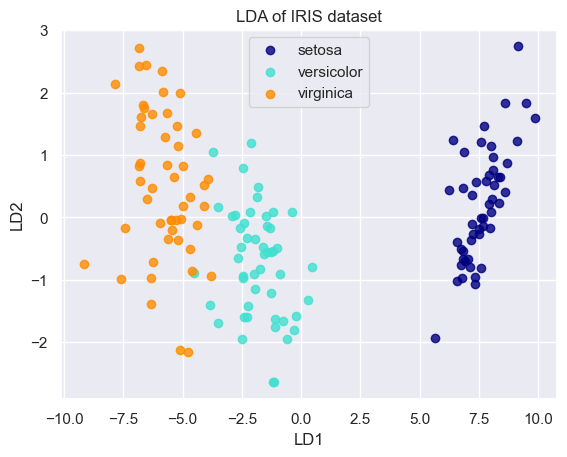

In [73]:
plt.figure()
colors=['navy', 'turquoise', 'darkorange']

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(res[Y==i, 0], res[Y==i, 1], alpha=0.8, color=color, label=target_name)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')
plt.show()

다음으로 confusion matrix를 이용하여 오분류를 관찰한다.

이전 버전의 sklearn.metrics.plot_confusion_matrix가 없어지고 ConfusionMatrixDisplay가 들어왔다.

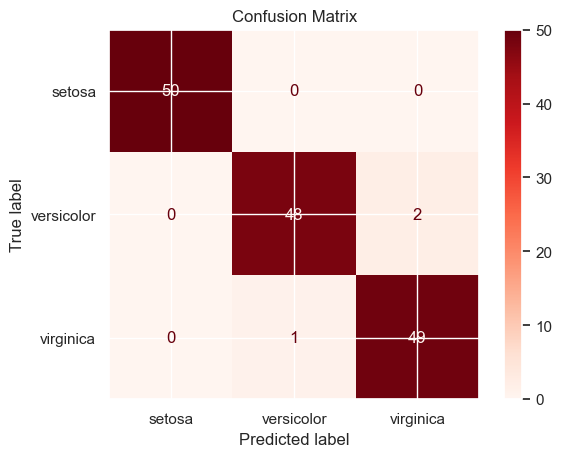

In [74]:
from sklearn.metrics import ConfusionMatrixDisplay

label=['setosa', 'versicolor', 'virginica']
plot=ConfusionMatrixDisplay.from_estimator(lda,
                           X, Y,
                           display_labels=label,
                           cmap=plt.cm.Reds,
                           normalize=None)
plot.ax_.set_title('Confusion Matrix')
plt.show()

In [75]:
# confusion matrix
from sklearn.metrics import confusion_matrix

mymtx=confusion_matrix(Y, lda.predict(X))
mymtx

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]], dtype=int64)

In [76]:
import pandas as pd

table=pd.DataFrame(mymtx, columns=label, index=label)
table

,setosa,versicolor,virginica
setosa,50,0,0
versicolor,0,48,2
virginica,0,1,49


다른 종에 비해 setosa의 분류 정확도가 높다는 것을 알 수 있다. (setosa를 다른 종으로 분류한 경우가 하나도 없다.)